<a href="https://colab.research.google.com/github/karlbryljaum/FINAL-CAPSTONE/blob/main/FINAL_CAPSTONE_JAUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Checking for null values before cleaning:
Year                      0
Average Attendance        1
Total Revenue ($)         0
Number of Teams           0
Social Media Followers    1
dtype: int64

Checking for null values after cleaning:
Year                      0
Average Attendance        0
Total Revenue ($)         0
Number of Teams           0
Social Media Followers    0
dtype: int64

Number of data points in cleaned dataset: 21

NumPy operations results:
Mean Average Attendance: 9649.90
Median Total Revenue: $54,565,922.00
Std Dev of Number of Teams: 2.17
Max Social Media Followers: 9,726,262
Min Average Attendance: 5206.00

SciPy t-test: t-statistic = -0.537, p-value = 0.597

Statsmodels OLS Regression summary:
                            OLS Regression Results                            
Dep. Variable:      Total Revenue ($)   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares

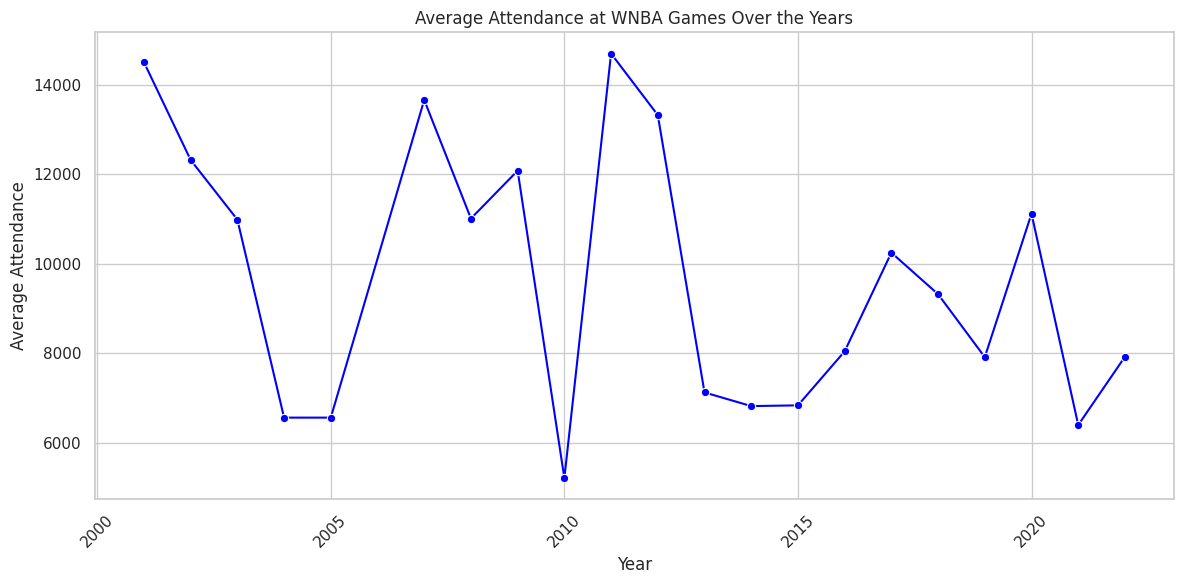

<ipython-input-5-e771d4c13156>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total Revenue ($)', data=df_clean, palette='viridis')


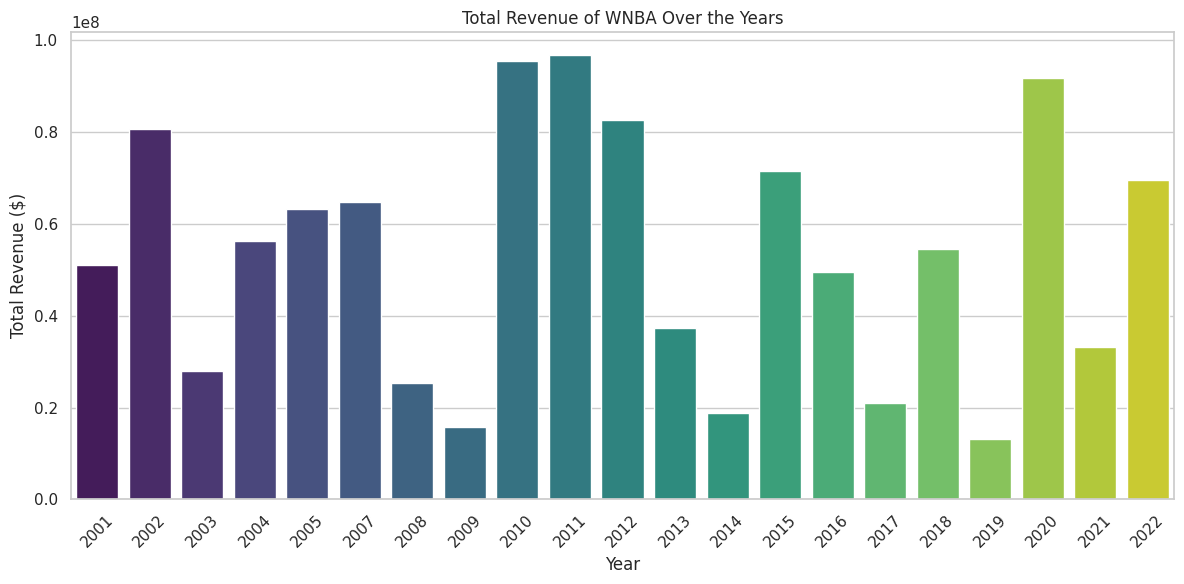

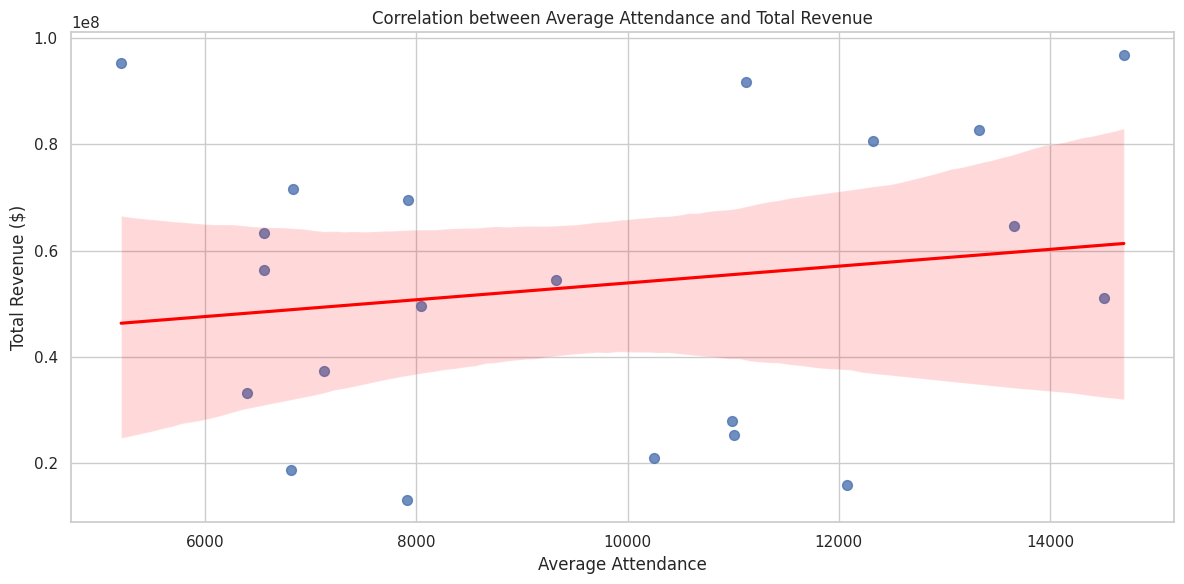

In [ ]:
+import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn visuals
sns.set(style="whitegrid")

# ---------- Step 1: Create synthetic dataset --------------

# Define years
years = np.arange(2000, 2023)  # 23 years of data

# Generate synthetic data
np.random.seed(42)  # For reproducibility
average_attendance = np.round(np.random.uniform(5000, 15000, size=len(years)))  # Avg attendance between 5,000 and 15,000
total_revenue = np.round(np.random.uniform(10e6, 100e6, size=len(years)))  # Revenue between $10M and $100M
number_of_teams = np.array([8 + (year - 2000) // 3 for year in years])  # Increment teams every 3 years starting from 8
social_media_followers = np.round(np.random.uniform(1e6, 10e6, size=len(years)))  # Followers between 1M and 10M

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Average Attendance': average_attendance,
    'Total Revenue ($)': total_revenue,
    'Number of Teams': number_of_teams,
    'Social Media Followers': social_media_followers
})

# Introduce a few NaN values randomly (to simulate dirty data) - 2 values max
for _ in range(2):
    ix = np.random.choice(df.index)
    col = np.random.choice(['Average Attendance', 'Total Revenue ($)', 'Social Media Followers'])
    df.at[ix, col] = np.nan

# ---------- Step 2: Data cleaning ----------
print("Checking for null values before cleaning:")
print(df.isnull().sum())

df_clean = df.dropna()

print("\nChecking for null values after cleaning:")
print(df_clean.isnull().sum())

print(f"\nNumber of data points in cleaned dataset: {len(df_clean)}")

# ---------- Step 3: NumPy operations ----------

mean_attendance = np.mean(df_clean['Average Attendance'])
median_revenue = np.median(df_clean['Total Revenue ($)'])
std_dev_teams = np.std(df_clean['Number of Teams'])
max_followers = np.max(df_clean['Social Media Followers'])
min_attendance = np.min(df_clean['Average Attendance'])

print("\nNumPy operations results:")
print(f"Mean Average Attendance: {mean_attendance:.2f}")
print(f"Median Total Revenue: ${median_revenue:,.2f}")
print(f"Std Dev of Number of Teams: {std_dev_teams:.2f}")
print(f"Max Social Media Followers: {max_followers:,.0f}")
print(f"Min Average Attendance: {min_attendance:.2f}")

# ---------- Step 4: SciPy operation ----------
# Example: One-sample t-test testing if average attendance significantly differs from 10,000
t_stat, p_value = stats.ttest_1samp(df_clean['Average Attendance'], 10000)
print(f"\nSciPy t-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# ---------- Step 5: Statsmodels operation ----------
# Linear regression: Predict Total Revenue from Average Attendance
X = df_clean['Average Attendance']
y = df_clean['Total Revenue ($)']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print("\nStatsmodels OLS Regression summary:")
print(model.summary())

# ---------- Step 6: Visualizations --------------

# Visualization 1: Average Attendance over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Average Attendance', data=df_clean, marker='o', color='blue')
plt.title('Average Attendance at WNBA Games Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Total Revenue over the Years
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total Revenue ($)', data=df_clean, palette='viridis')
plt.title('Total Revenue of WNBA Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Step 7: Correlation plot with regression line ----------
plt.figure(figsize=(12, 6))
sns.regplot(x='Average Attendance', y='Total Revenue ($)', data=df_clean, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Correlation between Average Attendance and Total Revenue')
plt.xlabel('Average Attendance')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
